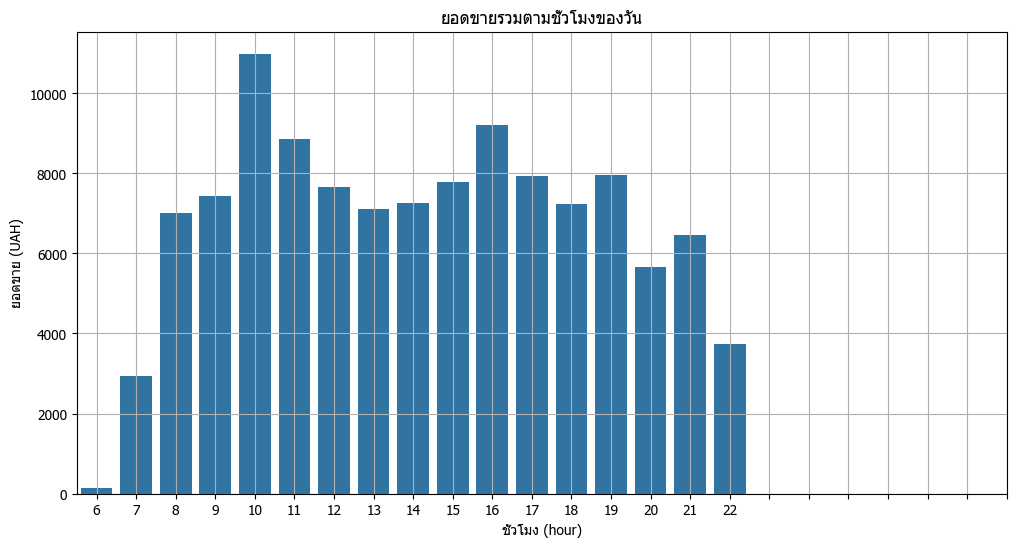

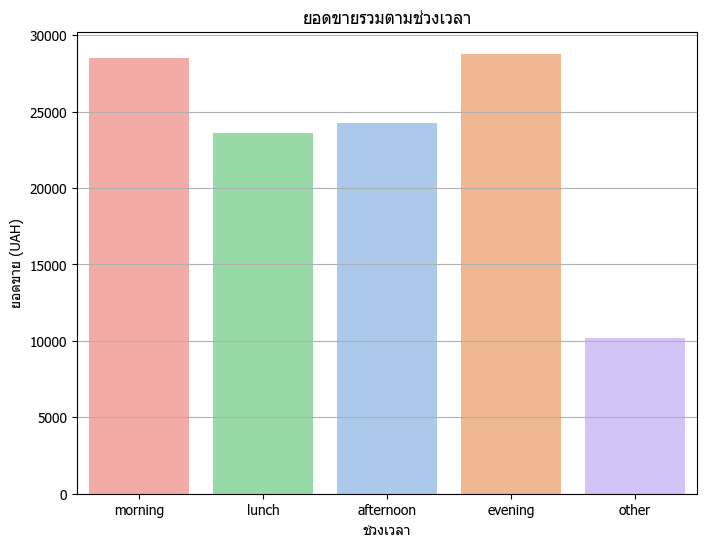

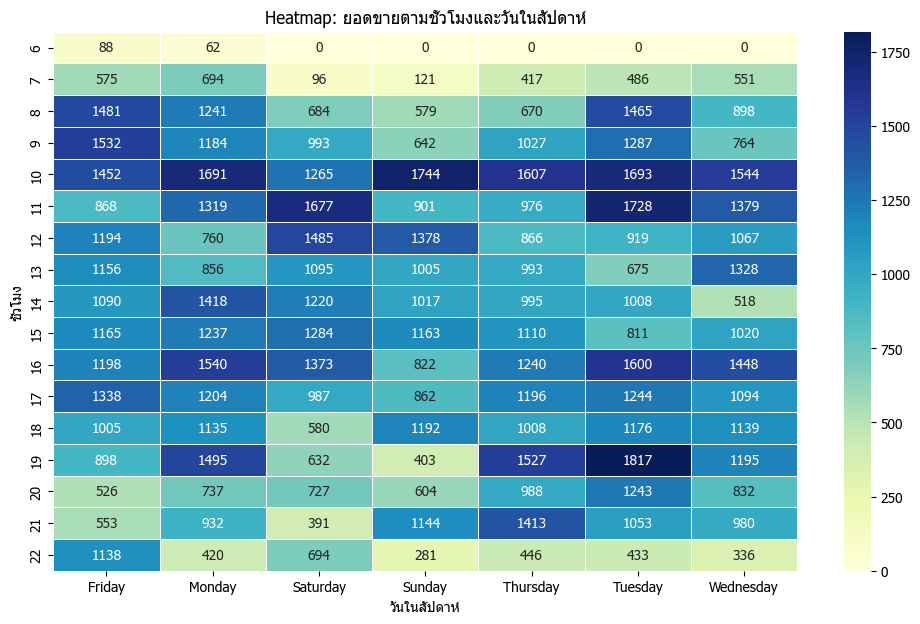

In [44]:
# -*- coding: utf-8 -*-
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 👇 Add this block to set Thai font for matplotlib
plt.rcParams['font.family'] = 'Tahoma'  # or 'Sarabun', 'Noto Sans Thai', etc.
# Ensure minus sign displays correctly
plt.rcParams['axes.unicode_minus'] = False


# 🔧 Step 1: Load Data
df = pd.read_csv("./source_data/coffee_sales.csv")

# 🧹 Step 2: Clean and Prepare Data
df['datetime'] = pd.to_datetime(df['datetime'])  # convert to datetime object
df['hour'] = df['datetime'].dt.hour

# สร้างช่วงเวลา (time range)


def get_time_range(hour):
    if 5 <= hour < 11:
        return 'morning'
    elif 11 <= hour < 14:
        return 'lunch'
    elif 14 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'other'


df['time_range'] = df['hour'].apply(get_time_range)

# ✨ Optional: สร้างคอลัมน์ชื่อวันในสัปดาห์
df['weekday'] = df['datetime'].dt.day_name()

# 📊 Step 3: Visualize Sales by Hour
hourly_sales = df.groupby('hour')['money'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_sales, x='hour', y='money')
plt.title('ยอดขายรวมตามชั่วโมงของวัน')
plt.xlabel('ชั่วโมง (hour)')
plt.ylabel('ยอดขาย (UAH)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# 🥧 Step 4: Visualize Sales by Time Range
time_range_sales = df.groupby('time_range')['money'].sum().reset_index()
order = ['morning', 'lunch', 'afternoon',
         'evening', 'other']  # เพื่อความเรียงสวย

plt.figure(figsize=(8, 6))
sns.barplot(data=time_range_sales, x='time_range',
            y='money', order=order, palette='pastel', hue='time_range')
plt.title('ยอดขายรวมตามช่วงเวลา')
plt.xlabel('ช่วงเวลา')
plt.ylabel('ยอดขาย (UAH)')
plt.grid(axis='y')
plt.show()

# 🔥 Step 5: Heatmap (ยอดขายตามชั่วโมง x วันในสัปดาห์)
pivot = df.pivot_table(index='hour', columns='weekday',
                       values='money', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 7))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=.5, annot=True, fmt=".0f")
plt.title('Heatmap: ยอดขายตามชั่วโมงและวันในสัปดาห์')
plt.xlabel('วันในสัปดาห์')
plt.ylabel('ชั่วโมง')
plt.show()